In [1]:
import rebound
%matplotlib inline
import matplotlib.pyplot as plt
import observations
import state
import mcmc
import driver
import numpy as np
from datetime import datetime

In [2]:
Niter, delta, L, mass = 2000, 0.01, 1, [18.0, 0.9, 2.5, 0.6]
np.random.seed(2000)

In [3]:
sol = [0.3200, 0.15, -0.11, 0.001965, 1.7, 0.58, 0.0, 0.0, 0.0013, 1.0]
initial_state = state.State(planets=[{"m":sol[3], "a":sol[0], "h":sol[1], "k":sol[2], "l":sol[4]}, {"m":sol[8], "a":sol[5], "l":sol[9]}], ignore_vars=['m', 'h', 'k'])
initial_state.hillRadiusFactor = 2.
obs = driver.create_obs(initial_state, 250, 3.5e-4, 7.e-5, 10.5)
#driver.plot_obs(initial_state, obs, [18,9])

In [4]:
print str(datetime.utcnow())
mcmc, chain, chainlogp = driver.run_hmc(Niter, initial_state, obs, delta, L, mass)
print str(datetime.utcnow())

2017-05-17 16:34:36.855881
Acceptance rate: 87.50%
2017-05-17 16:38:13.942459


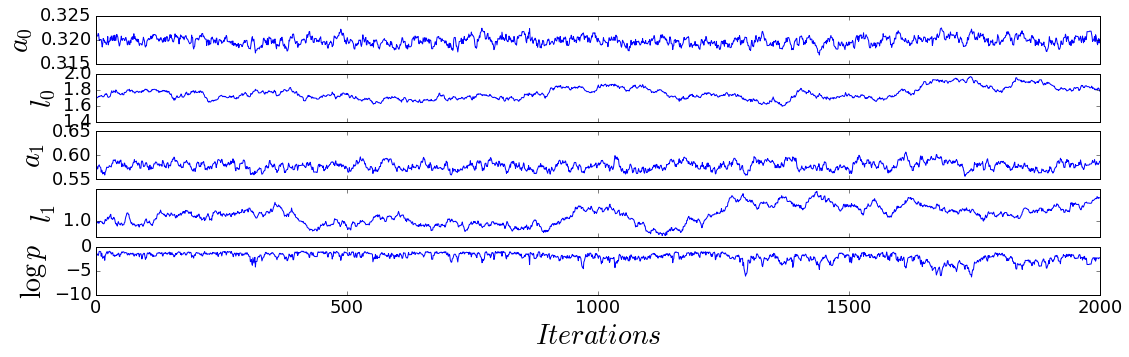

In [5]:
fig = plt.figure(figsize=(18,5))
for i in range(mcmc.state.Nvars):
    ax = plt.subplot(mcmc.state.Nvars+1,1,1+i)
    ax.set_ylabel(mcmc.state.get_keys()[i])
    ax.tick_params(axis='x', labelbottom='off')
    ax.yaxis.label.set_size(28)
    ax.tick_params(axis='both', labelsize=18)
    ax.locator_params(axis='y', nbins=3)
    ax.plot(chain[:,i])
ax = plt.subplot(mcmc.state.Nvars+1,1,mcmc.state.Nvars+1)
ax.set_ylabel("$\log \, p$")
ax.set_xlabel("$Iterations$")
ax.yaxis.label.set_size(28)
ax.xaxis.label.set_size(28)
ax.tick_params(axis='both', labelsize=18)
ax.locator_params(axis='y', nbins=3)
ax.plot(chainlogp)

Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$l_0$', '$a_1$', '$l_1$']
[ 0.3197955   1.7543497   0.57827321  1.07399648]


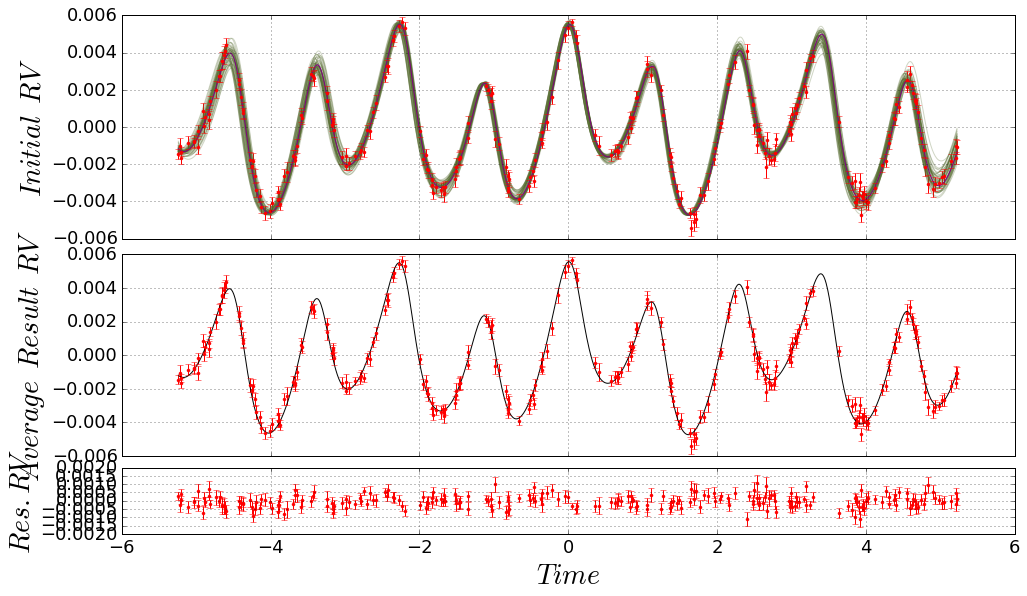

In [6]:
Ntrails = 50
list_of_states = []
for i in range(len(chain)):
    s = mcmc.state.deepcopy()
    s.set_params(chain[i])
    list_of_states.append(s)
fig = plt.figure(figsize=(16,4))
ax = plt.subplot(111)
selected = np.sort(np.random.choice(len(list_of_states), Ntrails))
for j in range(len(selected)):
    a = list_of_states[selected[j]]
    ax.plot(*a.get_rv_plotting(obs), alpha=0.28, color="darkolivegreen")

averageRandomState = mcmc.state.deepcopy()
averageRandomChain = np.average(chain, axis=0)
averageRandomState.set_params(averageRandomChain)
ax.plot(*initial_state.get_rv_plotting(obs), color="purple")
plt.errorbar(obs.t, obs.rv, yerr=obs.err, fmt='.r')
ax.set_xticklabels([])
plt.grid()
ax2=fig.add_axes([0.125, -0.63, 0.775, 0.7]) 
ax.set_ylabel("$Initial \,\,\, RV$")
ax2.set_ylabel("$Average \,\,\, Result \,\,\, RV$")
ax.yaxis.label.set_size(28)
ax2.yaxis.label.set_size(28)
ax.tick_params(axis='both', labelsize=18)
ax2.tick_params(axis='both', labelsize=18)
plt.plot(*averageRandomState.get_rv_plotting(obs), alpha=0.99,color="black")
print "Resulting average params state (randomly sampledriver.ind):"
print averageRandomState.get_keys()
print averageRandomState.get_params()
plt.errorbar(obs.t, obs.rv, yerr=obs.err, fmt='.r')
ax2.set_xticklabels([])
plt.grid()
ax3=fig.add_axes([0.125, -0.9, 0.775, 0.23])  
ax3.tick_params(axis='both', labelsize=18)  
ax3.yaxis.label.set_size(28)
ax3.set_ylabel("$Res. RV$") 
ax3.xaxis.label.set_size(28)
ax3.set_xlabel("$Time$")    
plt.errorbar(obs.t, averageRandomState.get_rv(obs.t)-obs.rv, yerr=obs.err, fmt='.r')
plt.grid()

In [7]:
Niter, delta, L, mass2 = 2000, 0.01, 1, [14.0, 0.64, 2.0, 0.41]
#Niter, delta, L, mass = 1000, 0.01, 1, [15.0, 0.66, 2.2, 0.43]
np.random.seed(2000)

In [8]:
sol = [0.3200, 0.15, -0.11, 0.001965, 1.7, 0.58, 0.0, 0.0, 0.0013, 1.0]
initial_state = state.State(planets=[{"m":sol[3], "a":sol[0], "h":sol[1], "k":sol[2], "l":sol[4]}, {"m":sol[8], "a":sol[5], "l":sol[9]}], ignore_vars=['m', 'h', 'k'])
initial_state.hillRadiusFactor = 2.
obs = driver.create_obs(initial_state, 250, 3.5e-4, 7.e-5, 10.5)
#driver.plot_obs(initial_state, obs, [18,9])

In [9]:
print str(datetime.utcnow())
mcmc2, chain2, chainlogp2 = driver.run_hmc(Niter, initial_state, obs, delta, L, mass2)
print str(datetime.utcnow())

2017-05-17 16:38:17.492240
Acceptance rate: 76.20%
2017-05-17 16:41:55.993618


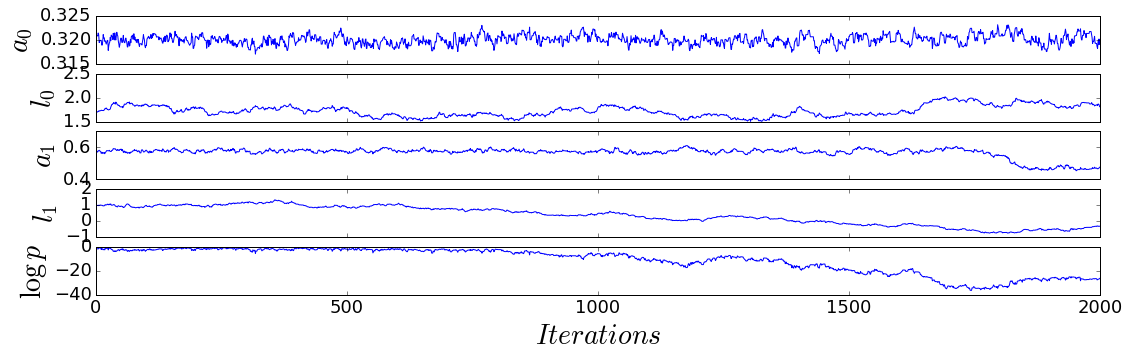

In [10]:
fig = plt.figure(figsize=(18,5))
for i in range(mcmc2.state.Nvars):
    ax = plt.subplot(mcmc2.state.Nvars+1,1,1+i)
    ax.set_ylabel(mcmc2.state.get_keys()[i])
    ax.tick_params(axis='x', labelbottom='off')
    ax.yaxis.label.set_size(28)
    ax.tick_params(axis='both', labelsize=18)
    ax.locator_params(axis='y', nbins=3)
    ax.plot(chain2[:,i])
ax = plt.subplot(mcmc2.state.Nvars+1,1,mcmc2.state.Nvars+1)
ax.set_ylabel("$\log \, p$")
ax.set_xlabel("$Iterations$")
ax.yaxis.label.set_size(28)
ax.xaxis.label.set_size(28)
ax.tick_params(axis='both', labelsize=18)
ax.locator_params(axis='y', nbins=3)
ax.plot(chainlogp2)

Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$l_0$', '$a_1$', '$l_1$']
[ 0.32002887  1.72303426  0.5665113   0.3487033 ]


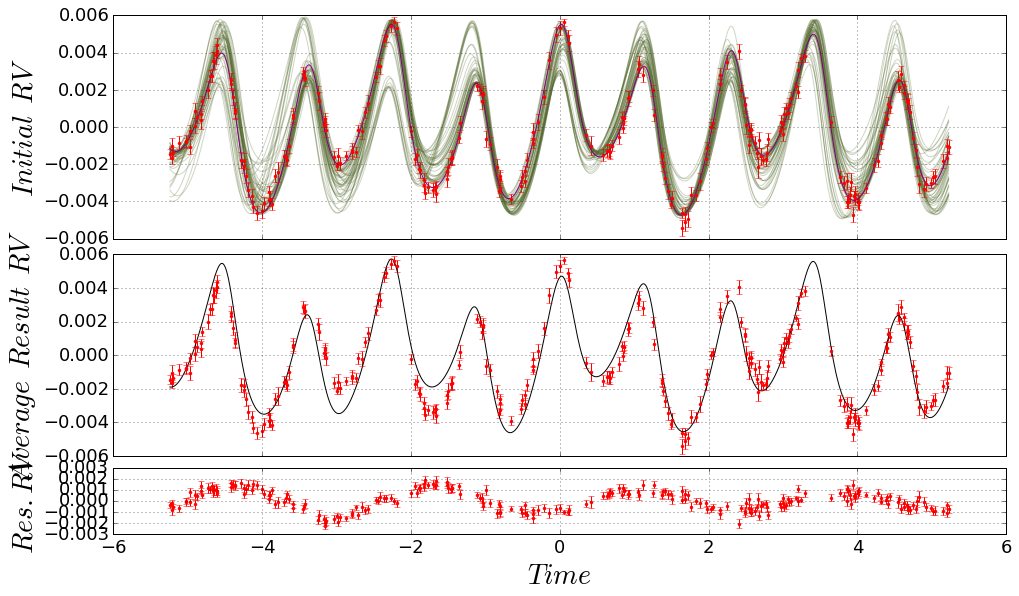

In [11]:
Ntrails = 50
list_of_states = []
for i in range(len(chain2)):
    s = mcmc2.state.deepcopy()
    s.set_params(chain2[i])
    list_of_states.append(s)
fig = plt.figure(figsize=(16,4))
ax = plt.subplot(111)
selected = np.sort(np.random.choice(len(list_of_states), Ntrails))
for j in range(len(selected)):
    a = list_of_states[selected[j]]
    ax.plot(*a.get_rv_plotting(obs), alpha=0.28, color="darkolivegreen")

averageRandomState = mcmc2.state.deepcopy()
averageRandomChain = np.average(chain2, axis=0)
averageRandomState.set_params(averageRandomChain)
ax.plot(*initial_state.get_rv_plotting(obs), color="purple")
plt.errorbar(obs.t, obs.rv, yerr=obs.err, fmt='.r')
ax.set_xticklabels([])
plt.grid()
ax2=fig.add_axes([0.125, -0.63, 0.775, 0.7]) 
ax.set_ylabel("$Initial \,\,\, RV$")
ax2.set_ylabel("$Average \,\,\, Result \,\,\, RV$")
ax.yaxis.label.set_size(28)
ax2.yaxis.label.set_size(28)
ax.tick_params(axis='both', labelsize=18)
ax2.tick_params(axis='both', labelsize=18)
plt.plot(*averageRandomState.get_rv_plotting(obs), alpha=0.99,color="black")
print "Resulting average params state (randomly sampledriver.ind):"
print averageRandomState.get_keys()
print averageRandomState.get_params()
plt.errorbar(obs.t, obs.rv, yerr=obs.err, fmt='.r')
ax2.set_xticklabels([])
plt.grid()
ax3=fig.add_axes([0.125, -0.9, 0.775, 0.23])  
ax3.tick_params(axis='both', labelsize=18)  
ax3.yaxis.label.set_size(28)
ax3.set_ylabel("$Res. RV$") 
ax3.xaxis.label.set_size(28)
ax3.set_xlabel("$Time$")    
plt.errorbar(obs.t, averageRandomState.get_rv(obs.t)-obs.rv, yerr=obs.err, fmt='.r')
plt.grid()